# Load Images Into a Dataset Using ImageFolder

# Version 2

In [54]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import os
import numpy as np

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform):
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        filename = self.df.values[index][0]
        labels = np.array([1, 1, 1, 1, 1, 1, 1, 1])
        for x in range(0, 8):
            labels[x] = self.df.values[index][x+1]
        image = PIL.Image.open(os.path.join(self.images_folder, filename))
        if self.transform is not None:
            image = self.transform(image)
        return image, labels

In [55]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])

root = "E:\\GitHub"

trainDataset = CustomDataset(root + "\\poly-curve-detector\\DataGeneration\\plotData\\labels\\trainPlots.csv",
                               root + "\\poly-curve-detector\\DataGeneration\\plotData\\trainPlots", transform)

testDataset = CustomDataset(root + "\\poly-curve-detector\\DataGeneration\\plotData\\labels\\testPlots.csv",
                               root + "\\poly-curve-detector\\DataGeneration\\plotData\\testPlots", transform)

#print first label in each dataset
#labels in order [a1, a2, a3, a4, a5, a6, a7, a8]
image, labels = trainDataset[0]
print(labels[0:9])
image, labels = testDataset[0]
print(labels[0:9])

[-9  4 10  8  6 10 10 10]
[10  6 -9 -8  2 -8 -3  7]


In [56]:
train_set = torch.utils.data.DataLoader(trainDataset, shuffle=True, batch_size=128)
test_set = torch.utils.data.DataLoader(testDataset, shuffle=False, batch_size=128)

### Select the First Image Loaded Into Each Dataset and Display to Verify

torch.Size([128, 1, 96, 96]) torch.Size([128, 8])
Train Set 0
Image: tensor([[[0.6745, 0.8235, 0.8235,  ..., 0.8235, 0.8235, 0.6745],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         ...,
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.6745, 0.8235, 0.8235,  ..., 0.8235, 0.8235, 0.6745]]])
Labels: tensor([-9, -2, -4, -4, -3, -4,  3, -5], dtype=torch.int32)

torch.Size([1, 96, 96]) torch.Size([8])


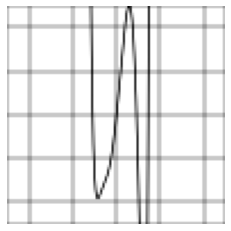

torch.Size([128, 1, 96, 96]) torch.Size([128, 8])
Test Set 0
Image: tensor([[[0.6745, 0.8235, 0.8235,  ..., 0.8235, 0.8235, 0.6745],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         ...,
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.8235, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.8235],
         [0.6745, 0.8235, 0.8235,  ..., 0.8235, 0.8235, 0.6745]]])
Labels: tensor([10,  6, -9, -8,  2, -8, -3,  7], dtype=torch.int32)

torch.Size([1, 96, 96]) torch.Size([8])


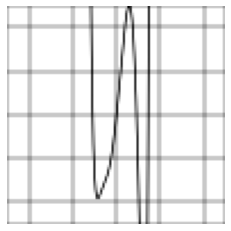

In [58]:
#one way to see batch size
train_batch = next(iter(train_set))
train_img, train_lbls = train_batch
print(train_img.shape, train_lbls.shape)

#display the first image in train_set
#note: image changes each time run because shuffle is set to true
for train_images, train_labels in train_set:
    image0 = train_images[0]
    label0 = train_labels[0]
    print(f"Train Set 0\nImage: {image0}\nLabels: {label0}\n")
    print(image0.shape, label0.shape)
    figure = plt.figure(figsize=(4,4))
    figure.add_subplot()
    plt.axis("off")
    plt.imshow(image.permute(1,2,0), cmap="gray")
    plt.show()
    
    break
    
#test batch size
test_batch = next(iter(test_set))
test_img, test_lbls = test_batch
print(test_img.shape, test_lbls.shape)

#display the first image in test_set
for test_images, test_labels in test_set:
    image1 = test_images[0]
    label1 = test_labels[0]
    print(f"Test Set 0\nImage: {image1}\nLabels: {label1}\n")
    print(image1.shape, label1.shape)
    figure = plt.figure(figsize=(4,4))
    figure.add_subplot()
    plt.axis("off")
    plt.imshow(image.permute(1,2,0), cmap="gray")
    plt.show()
    
    break
